In [1]:
import logging
from pathlib import Path

from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
from IPython.display import HTML
from matplotlib import animation
from matplotlib import pyplot as plt
from rich.logging import RichHandler
from statix.exposure import Exposure
from statix.plotting import plot_image, plot_lightcurve

plt.style.use("Solarize_Light2")

logging.basicConfig(level=logging.INFO, format="%(message)s", handlers=[RichHandler()])
data_path = Path(".", "data")


def source_marker(ax, coords):
    ax.scatter(*coords, marker="o", edgecolor="w", s=100, c="none", linewidths=2, ls=":")

SAS has not been initialized in your system!
SAS-related functions not available!!!
SAS has not been initialized in your system!
SAS-related functions not available!!!


In [2]:
event_list_path = data_path / "pnevt.fits"
attitude_path = data_path / "att.fits"
xmmexp = Exposure(event_list_path, attitude_path)

# Transient source used as input for the simulation
ssc = SkyCoord(0, 0, unit="deg")
spc = ssc.to_pixel(xmmexp.image.wcs)

xmmexp

Exp.ID: S003 [EPN camera], Obs.ID: 0000000000
Energy band for products: SOFT (0.5-2.0 keV)
Nominal pointing: 00h00m00s +00d00m00s
PA: 90.0 deg

In [3]:
srclist_emldet = xmmexp.detect_sources(method="emldetect", likemin=6)

[06/15/24 15:15:53] INFO     Detecting sources using emldetect algorithm...                          ]8;id=482240;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/exposure.py\exposure.py]8;;\:]8;id=230837;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/exposure.py#83\83]8;;\

                    WARNING  Loading previous emldetect run.                                ]8;id=803588;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=155067;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py#517\517]8;;\

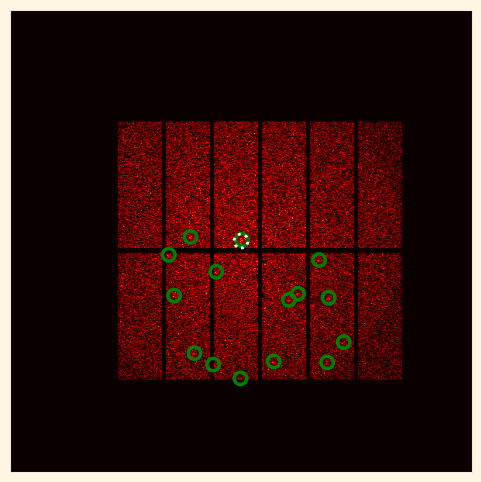

In [4]:
mask_detections = srclist_emldet["EP_DET_ML"] > 6
detections = srclist_emldet[mask_detections]

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(111)
plot_image(ax, xmmexp.image.data, use_norm=False, cmap="hot", srclist=detections)
source_marker(ax, spc)
plt.show()

In [5]:
srclist_msvst2d, image_msvst = xmmexp.detect_sources(method="msvst2d", sigma_level=3)

[06/15/24 15:15:59] INFO     Detecting sources using msvst2d algorithm...                            ]8;id=457343;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/exposure.py\exposure.py]8;;\:]8;id=266133;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/exposure.py#83\83]8;;\

                    INFO     Filling image gaps...                                           ]8;id=877137;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=303709;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py#79\79]8;;\

[06/15/24 15:16:15] INFO     Denoising image using 2D MSVST...                               ]8;id=797304;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=629588;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py#82\82]8;;\

[06/15/24 15:16:19] INFO     Finding peaks in denoised image...                              ]8;id=630837;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=52412;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py#90\90]8;;\

                    INFO     Extracting counts for 175 sources...                           ]8;id=991755;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=866638;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py#111\111]8;;\

                    INFO     Calculating background image                                           ]8;id=734222;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/exposure.py\exposure.py]8;;\:]8;id=198529;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/exposure.py#272\272]8;;\

[06/15/24 15:16:22] INFO     Extracting light-curves...                                               ]8;id=853890;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/counts.py\counts.py]8;;\:]8;id=116677;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/counts.py#106\106]8;;\

[06/15/24 15:16:23] INFO     Calculating fluxes...                                          ]8;id=564829;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=763574;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py#116\116]8;;\

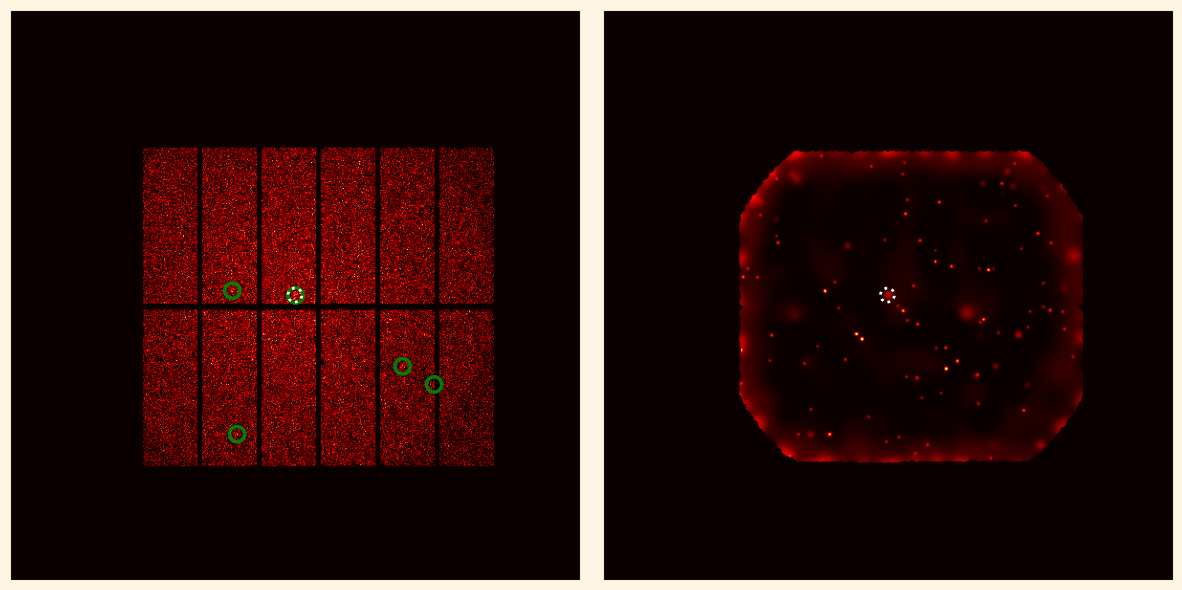

In [6]:
mask_detections = srclist_msvst2d["DET_ML"] > 6
detections = srclist_msvst2d[mask_detections]

norm = simple_norm(xmmexp.image.data, "asinh")

fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(121)
plot_image(ax, xmmexp.image.data, use_norm=False, cmap="hot", srclist=detections)
source_marker(ax, spc)

ax = plt.subplot(122)
plot_image(ax, image_msvst.data, use_norm=False, cmap="hot")
source_marker(ax, spc)

plt.tight_layout()
plt.show()

In [7]:
srclist_msvst, cube_msvst = xmmexp.detect_sources(method="msvst2d1d", sigma_level=3, time_sigma_level=3)

[06/15/24 15:16:38] INFO     Detecting sources using msvst2d1d algorithm...                          ]8;id=97124;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/exposure.py\exposure.py]8;;\:]8;id=446245;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/exposure.py#83\83]8;;\

                    INFO     Filling cube gaps (mca)...                                             ]8;id=83219;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/exposure.py\exposure.py]8;;\:]8;id=116336;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/exposure.py#225\225]8;;\

[06/15/24 15:25:01] INFO     Denoising cube using 2D+1D MSVST...                            ]8;id=620020;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=790381;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py#180\180]8;;\

[06/15/24 15:33:18] WARNING  No GTI extension in file.                                                  ]8;id=67708;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/image.py\image.py]8;;\:]8;id=23734;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/image.py#60\60]8;;\

                    INFO     Finding peaks in denoised cube...                              ]8;id=986358;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=199591;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py#196\196]8;;\

                    INFO     Extracting counts in optimized time intervals for 2082         ]8;id=658317;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=227058;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py#217\217]8;;\
                             sources...                                                                            

                    INFO     Calculating background cube                                            ]8;id=421912;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/exposure.py\exposure.py]8;;\:]8;id=894594;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/exposure.py#282\282]8;;\

[06/15/24 15:33:50] INFO     Extracting light-curves...                                               ]8;id=166555;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/counts.py\counts.py]8;;\:]8;id=457105;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/counts.py#106\106]8;;\

[06/15/24 15:36:52] INFO     Calculating fluxes...                                          ]8;id=357779;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=901193;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py#223\223]8;;\

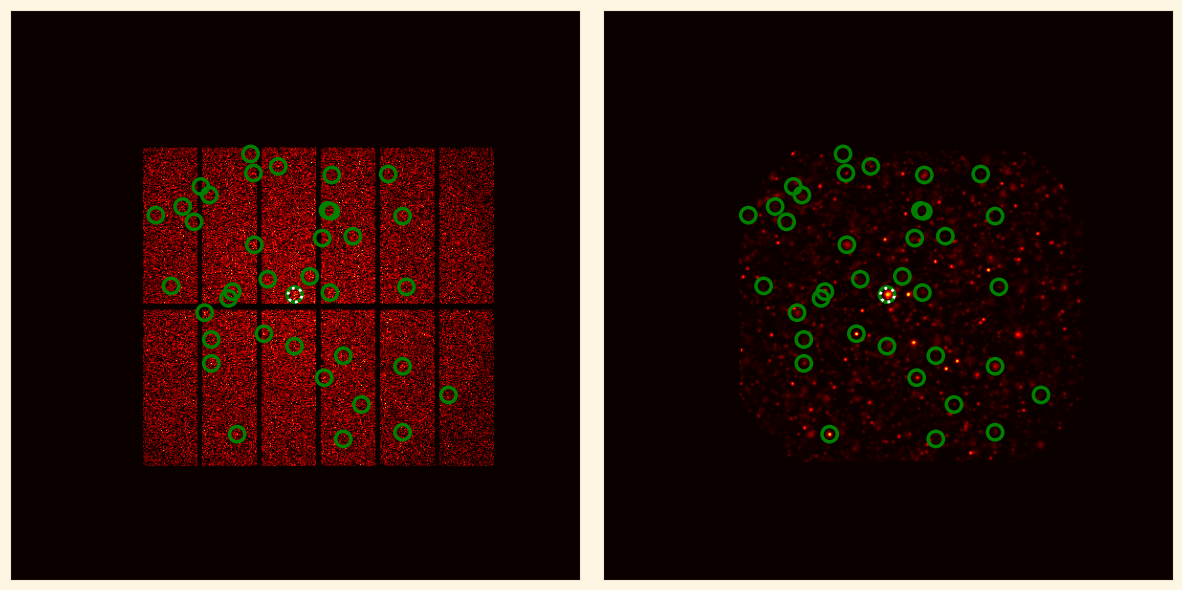

In [8]:
mask_detections = srclist_msvst["DET_ML"] > 6
detections = srclist_msvst[mask_detections]

norm = simple_norm(xmmexp.cube.time_integrated.data, "asinh")

fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(121)
plot_image(ax, xmmexp.cube.time_integrated.data, use_norm=False, cmap="hot", srclist=detections)
source_marker(ax, spc)

ax = plt.subplot(122)
plot_image(ax, cube_msvst.time_integrated.data, use_norm=False, cmap="hot", srclist=detections)
source_marker(ax, spc)

plt.tight_layout()
plt.show()

In [9]:
srclist_msvst2, cube_msvst2 = xmmexp.detect_sources(method="msvst2d1d", sigma_level=4, time_sigma_level=4)

[06/15/24 15:37:49] INFO     Detecting sources using msvst2d1d algorithm...                          ]8;id=468601;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/exposure.py\exposure.py]8;;\:]8;id=544757;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/exposure.py#83\83]8;;\

                    INFO     Denoising cube using 2D+1D MSVST...                            ]8;id=629250;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=694984;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py#180\180]8;;\

[06/15/24 15:46:07] WARNING  No GTI extension in file.                                                  ]8;id=313682;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/image.py\image.py]8;;\:]8;id=261762;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/image.py#60\60]8;;\

                    INFO     Finding peaks in denoised cube...                              ]8;id=668872;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=488047;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py#196\196]8;;\

                    INFO     Extracting counts in optimized time intervals for 172          ]8;id=397901;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=368773;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py#217\217]8;;\
                             sources...                                                                            

                    INFO     Extracting light-curves...                                               ]8;id=256407;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/counts.py\counts.py]8;;\:]8;id=458482;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/counts.py#106\106]8;;\

[06/15/24 15:46:23] INFO     Calculating fluxes...                                          ]8;id=701094;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=637104;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/statix/source_detection.py#223\223]8;;\

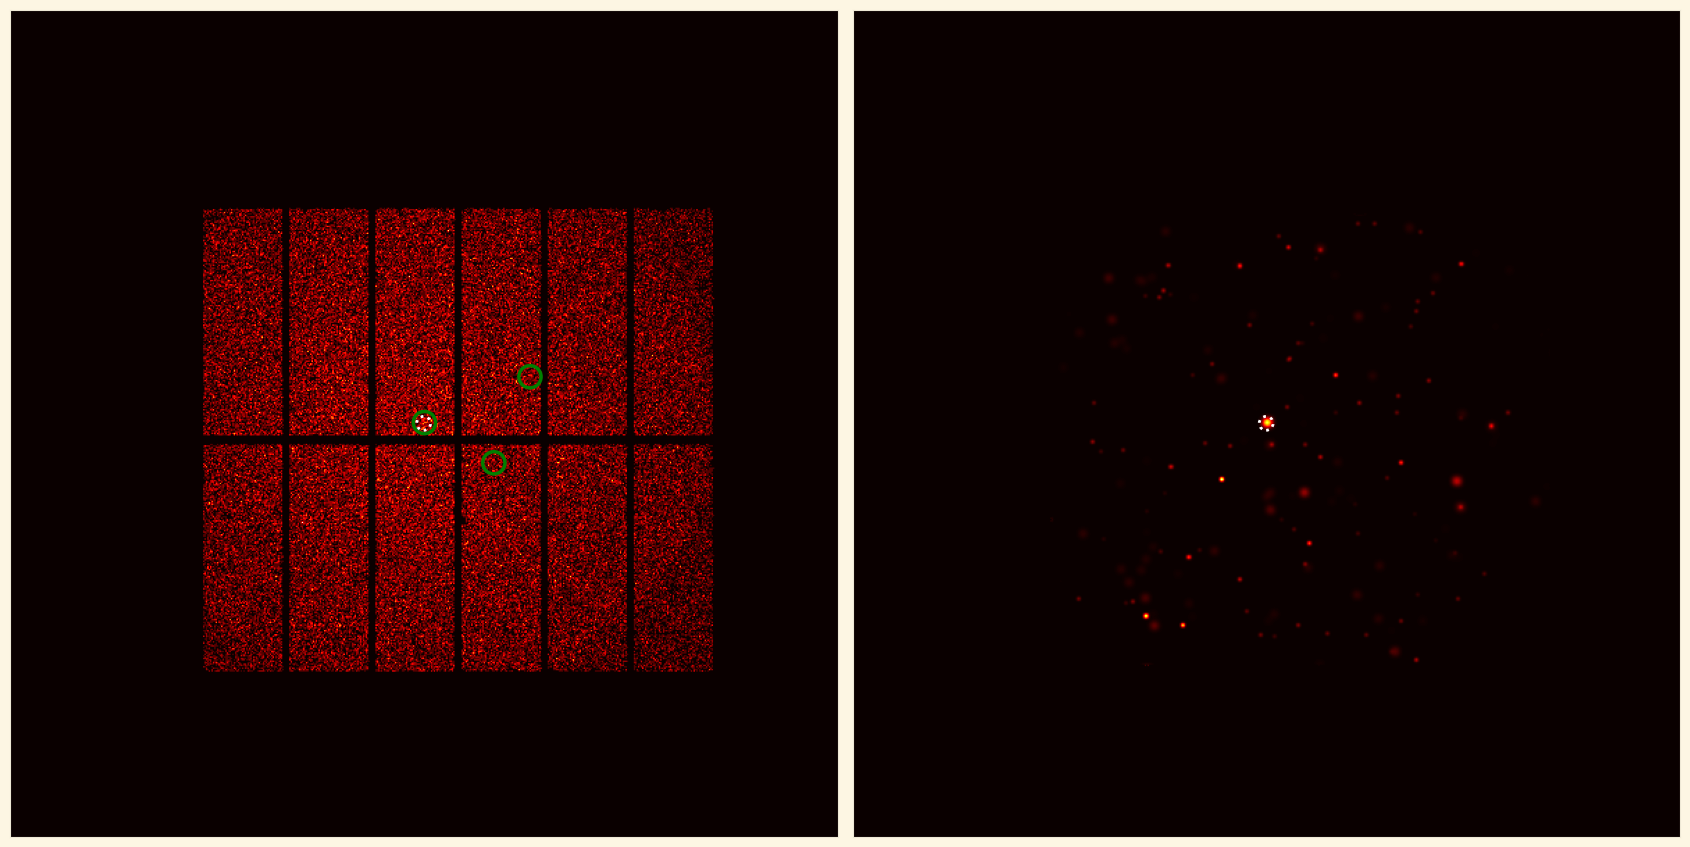

In [10]:
mask_detections = srclist_msvst2["DET_ML"] > 6
detections = srclist_msvst2[mask_detections]

norm = simple_norm(xmmexp.cube.time_integrated.data, "linear")

fig = plt.figure(figsize=(17, 9))
ax = plt.subplot(121)
plot_image(ax, xmmexp.cube.time_integrated.data, use_norm=False, cmap="hot", srclist=detections)
source_marker(ax, spc)

ax = plt.subplot(122)
plot_image(ax, cube_msvst2.time_integrated.data, use_norm=False, cmap="hot")
source_marker(ax, spc)

plt.tight_layout()
plt.show()

(-0.5, 39.5, -0.5, 39.5)

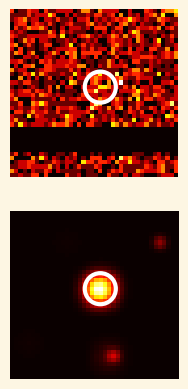

In [11]:
xmmexp.cube.time_integrated.data

ds = 20
center_data = xmmexp.cube.time_integrated.data[int(spc[0])-ds:int(spc[0])+ds, int(spc[1])-ds:int(spc[1])+ds]
center_msvst = cube_msvst2.time_integrated.data[int(spc[0])-ds:int(spc[0])+ds, int(spc[1])-ds:int(spc[1])+ds]

plt.subplot(221)
plt.imshow(center_data, origin="lower", cmap="hot")
plt.scatter(ds + 1, ds + 1, marker="o", edgecolor="w", s=500, c="none", linewidths=3)
plt.axis("off")

plt.subplot(223)
plt.imshow(center_msvst, origin="lower", cmap="hot")
plt.scatter(ds + 1, ds + 1, marker="o", edgecolor="w", s=500, c="none", linewidths=3)
plt.axis("off")

In [21]:
norm_data = simple_norm(center_data, "linear")
norm_msvst = simple_norm(center_msvst, "asinh")

ds = 20
center_data = xmmexp.cube.data[:, int(spc[0])-ds:int(spc[0])+ds, int(spc[1])-ds:int(spc[1])+ds+1]
center_msvst = cube_msvst2.data[:, int(spc[0])-ds:int(spc[0])+ds, int(spc[1])-ds:int(spc[1])+ds+1]

lc = detections[2]["LC"]
lc_bb = detections[2]["LC_BB"]


fig, ax = plt.subplot_mosaic(
    [['A', 'C'], ['B', 'C']], width_ratios=[1,3], constrained_layout=True, figsize=(11, 5)
)
plot_lightcurve(ax["C"], lc, xmmexp.cube.time_edges, lc_bb, animated=True)

ims = []
for frame, frame_msvst in zip(center_data, center_msvst):
    ims_frame = []

    im = ax["A"].imshow(frame, origin="lower", cmap="hot", norm=norm_data, animated=True)
    ax["A"].set_axis_off()
    ims_frame.append(im)

    im = ax["B"].imshow(frame_msvst, origin="lower", cmap="hot", norm=norm_msvst, animated=True)
    ax["B"].set_axis_off()
    ims_frame.append(im)
    
    im = ax["C"].axvline(xmmexp.cube.time_midpoints[len(ims)], ls="--", color="C4")
    ims_frame.append(im)

    ims.append(ims_frame)

plt.close()

ani = animation.ArtistAnimation(fig, ims, interval=300, blit=True, repeat_delay=1000)
HTML(ani.to_jshtml())

[06/15/24 15:52:07] INFO     Animation.save using <class 'matplotlib.animation.HTMLWriter'>       ]8;id=826138;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/matplotlib/animation.py\animation.py]8;;\:]8;id=878275;file:///home/ruizca/.conda/envs/xsa_statix_pipeline/lib/python3.10/site-packages/matplotlib/animation.py#1060\1060]8;;\